# Live


### caliberate

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane


#objpoints = list(np.load("objpoints.npy"))
#imgpoints = list(np.load("imgpoints.npy"))
#objpoints = objpoints[:1000:30]
#objpoints = imgpoints[:1000:30]

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER  , 30, 0.001)

In [6]:
os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

['WIN_20191114_15_38_44_Pro.jpg',
 'WIN_20191114_15_39_39_Pro.jpg',
 'WIN_20191114_15_39_53_Pro.jpg',
 'WIN_20191114_15_40_01_Pro.jpg',
 'WIN_20191114_15_40_05_Pro.jpg',
 'WIN_20191114_15_40_15_Pro.jpg',
 'WIN_20191114_15_40_21_Pro.jpg',
 'WIN_20191115_15_41_57_Pro.jpg',
 'WIN_20191115_15_42_01_Pro.jpg',
 'WIN_20191115_15_42_07_Pro.jpg',
 'WIN_20191115_15_42_11_Pro.jpg',
 'WIN_20191115_15_42_15_Pro.jpg',
 'WIN_20191115_15_42_22_Pro.jpg',
 'WIN_20191115_15_42_29_Pro.jpg',
 'WIN_20191115_15_42_38_Pro.jpg',
 'WIN_20191115_15_42_42_Pro.jpg',
 'WIN_20191115_15_47_34_Pro.jpg',
 'WIN_20191115_15_47_39_Pro.jpg',
 'WIN_20191115_15_47_42_Pro.jpg',
 'WIN_20191115_15_47_50_Pro.jpg',
 'WIN_20191115_15_48_07_Pro.jpg',
 'WIN_20191115_15_48_13_Pro.jpg']

In [7]:
pathTtoimg = "C:/Users/shrin/Pictures/Camera Roll/img/"
imgs = os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

for frm in imgs:
    frame = cv2.imread(pathTtoimg+frm)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,50,250,cv2.THRESH_BINARY)
    ret, corners = cv2.findChessboardCorners(thresh, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(thresh,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(frame, (9,6), corners2,ret)
        
        # calibrate cam
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
        

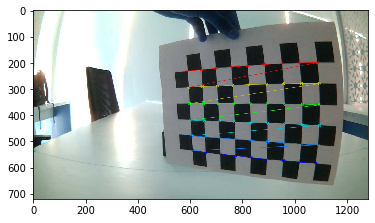

In [8]:
plt.imshow(frame)

Text(0.5, 1, 'undistorted')

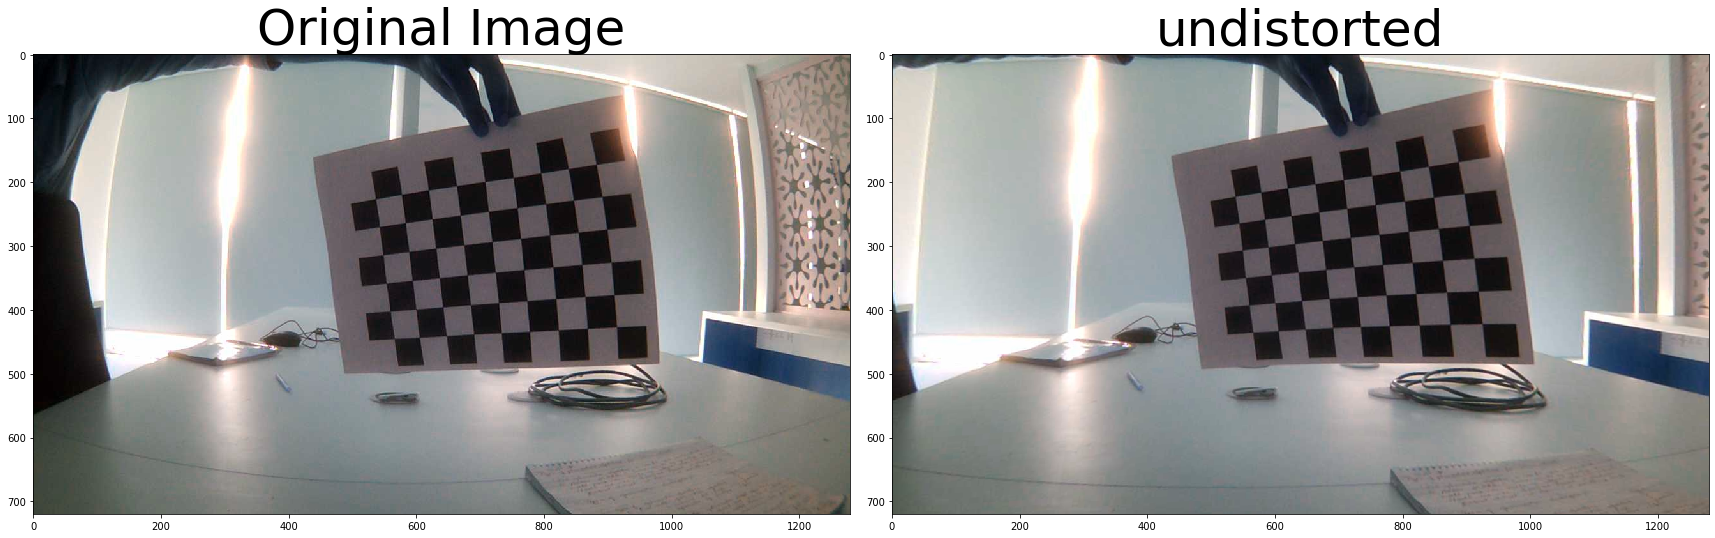

In [9]:
frame = cv2.imread(pathTtoimg+imgs[3])
#frame = cv2.imread("C:/Users/shrin/Documents/Abhilash/PICT0227.jpg")
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(frame, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(frame)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('undistorted',fontsize = 50)

In [10]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

# A4 measure

In [11]:
# WIN_20191118_12_27_37_Pro.jpg d= 810
# WIN_20191118_12_28_21_Pro.jpg d = 1040
# WIN_20191120_12_12_58_Pro.jpg d = 410mm h = 180mm
# WIN_20191120_12_16_57_Pro.jpg d = 810mm h = 230mm
jkbond = cv2.imread("C:/Users/shrin/Pictures/Camera Roll/WIN_20191120_12_16_57_Pro.jpg")

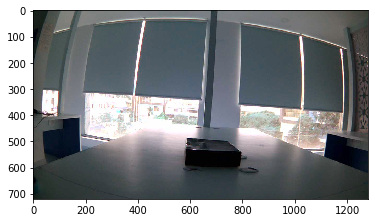

In [12]:
plt.imshow(jkbond)

Text(0.5, 1, 'undistorted')

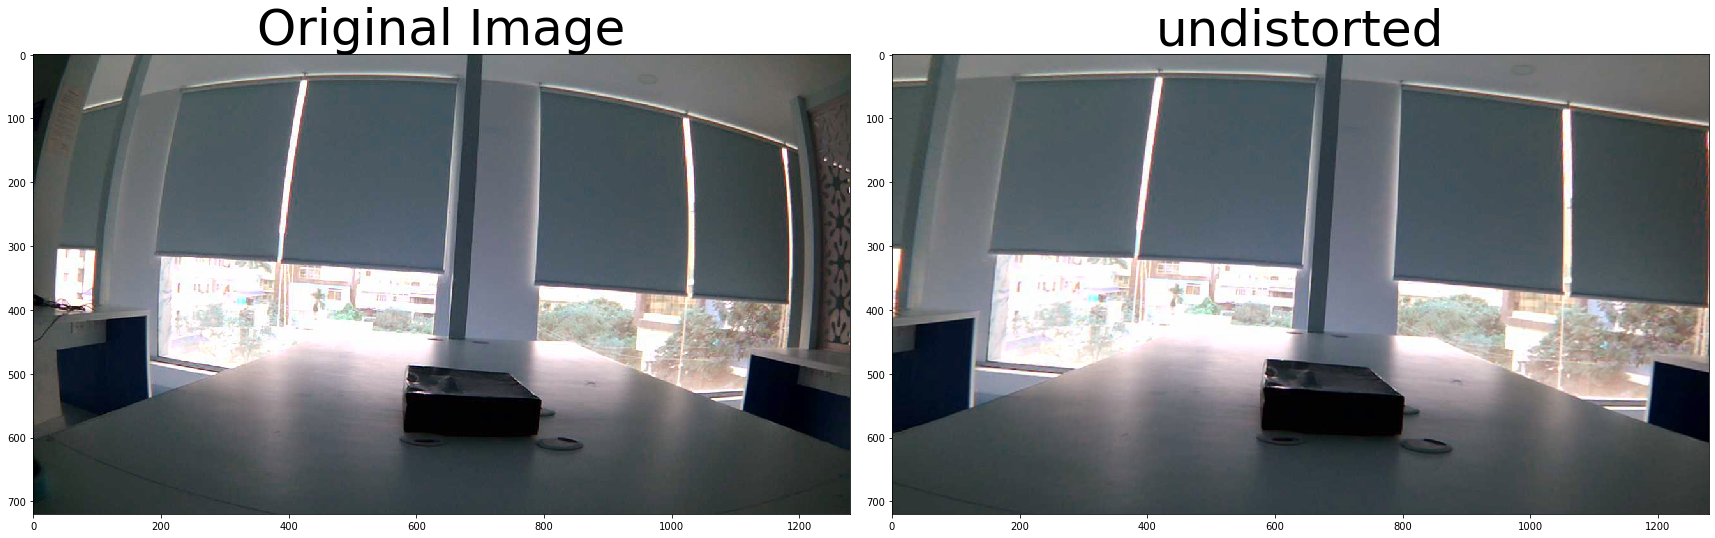

In [13]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(jkbond, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(jkbond)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('undistorted',fontsize = 50)

In [14]:
print("shape of original image      =", jkbond.shape, "\nshape of undistorted image   =", undistorted.shape)

shape of original image      = (720, 1280, 3) 
shape of undistorted image   = (720, 1280, 3)


In [15]:
undistortedGray = cv2.cvtColor(undistorted,cv2.COLOR_BGR2GRAY)

%matplotlib notebook

In [16]:
# x,y WIN_20191118_12_27_37_Pro.jpg d= 810
tl = [520,445]
tr = [683,445]
ml = [491,482]
mr = [712,482]
bl = [491,547]
br = [712,547]
allPoints = [tl, tr, ml, mr, bl, br]

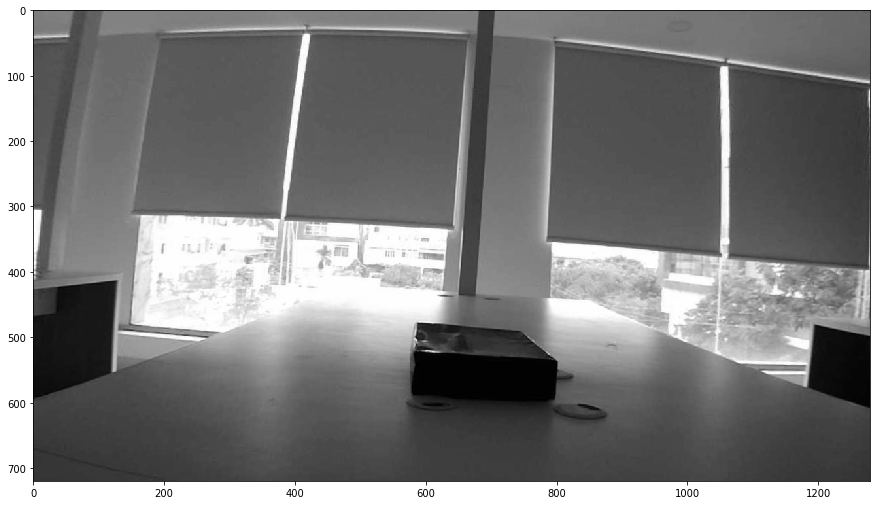

In [17]:
plt.figure(figsize=(15,18))

plt.imshow(undistortedGray,"gray")

In [18]:
# x,y WIN_20191120_12_16_57_Pro.jpg d = 810mm h = 230mm
tl = [585,477]
tr = [745,489]
ml = [582,522]
mr = [802,536]
bl = [580,587]
br = [796,594]
allPoints = [tl, tr, ml, mr, bl, br]

# x,y WIN_20191120_12_12_58_Pro.jpg d = 410mm h = 180mm
tl = [485,486]
tr = [730,500]
ml = [416,573]
mr = [823,590]
bl = [416,688]
br = [815,699]
allPoints = [tl, tr, ml, mr, bl, br]

# x,y WIN_20191118_12_28_21_Pro.jpg d = 1040
tl = [576,435]
tr = [711,438]
ml = [568,457]
mr = [740,457]
bl = [568,508]
br = [740,506]
allPoints = [tl, tr, ml, mr, bl, br]

In [19]:
for i in allPoints:
    img = cv2.circle(undistorted, tuple(i), 5, 255, 5)

In [20]:
middlex = ((tl[0]+tr[0])/2) 
middley = ((tl[1]+tr[1])/2) 

In [21]:
print(middlex,middley)
img = cv2.circle(undistorted, (int(middlex),int(middley)), 5, (255,120,0), 5)

665.0 483.0


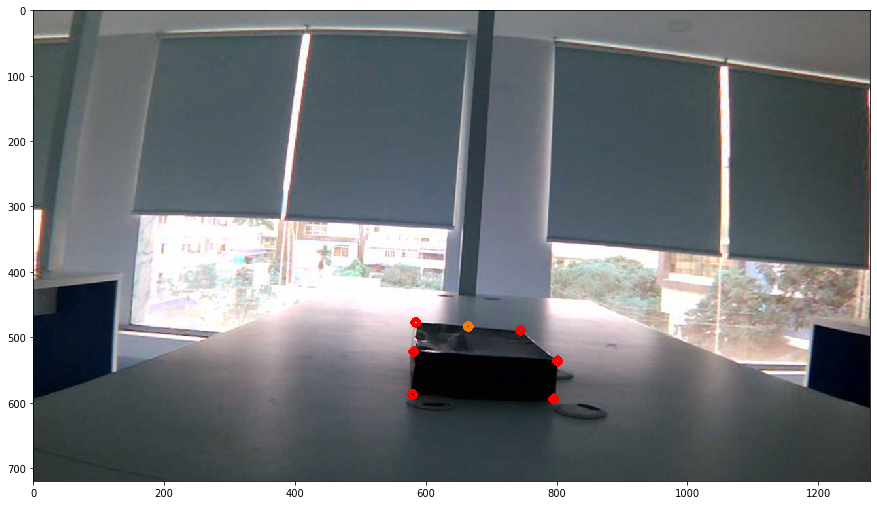

In [22]:
plt.figure(figsize=(15,18))
plt.imshow(undistorted,"gray")

In [23]:
_,undistortedThreh = cv2.threshold(undistortedGray,90,250,cv2.THRESH_BINARY)
gauss = cv2.adaptiveThreshold(undistortedGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,25)

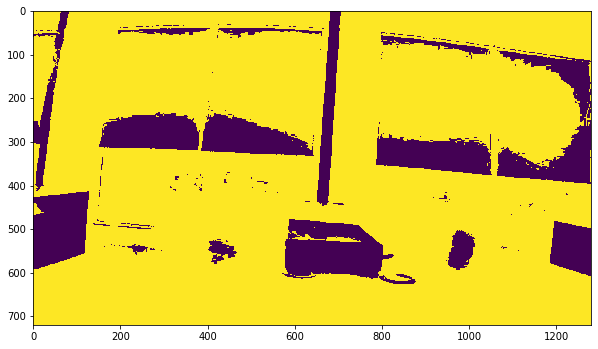

In [24]:
plt.figure(figsize=(10,12))
plt.imshow(gauss)

In [25]:
_ , contours, hierarchy =   cv2.findContours(gauss.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [26]:
blank = np.zeros((gauss.shape),dtype = np.uint8)
blank1 = undistortedGray.copy()

blank = cv2.drawContours(blank,cnts,1,(255,255,0),3)

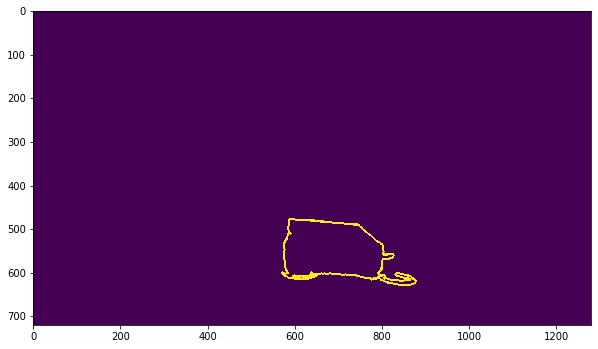

In [27]:
plt.figure(figsize=(10,12))
plt.imshow(blank)

In [28]:
cnts[1]

array([[[587, 478]],

       [[588, 477]],

       [[599, 477]],

       [[600, 478]],

       [[608, 478]],

       [[609, 479]],

       [[613, 479]],

       [[614, 478]],

       [[617, 478]],

       [[618, 479]],

       [[635, 479]],

       [[636, 480]],

       [[647, 480]],

       [[648, 481]],

       [[658, 481]],

       [[659, 482]],

       [[666, 482]],

       [[667, 483]],

       [[671, 483]],

       [[672, 484]],

       [[685, 484]],

       [[686, 485]],

       [[698, 485]],

       [[699, 486]],

       [[712, 486]],

       [[713, 487]],

       [[723, 487]],

       [[724, 488]],

       [[734, 488]],

       [[735, 489]],

       [[745, 489]],

       [[746, 490]],

       [[747, 490]],

       [[750, 493]],

       [[750, 494]],

       [[752, 496]],

       [[753, 496]],

       [[756, 499]],

       [[756, 500]],

       [[758, 502]],

       [[759, 502]],

       [[764, 507]],

       [[765, 507]],

       [[769, 511]],

       [[770, 511]],

       [[7

In [29]:
x,y,w,h = cv2.boundingRect(cnts[1])
print("{}, {}, {}, {}".format(x,y,w,h))

571, 477, 308, 152


In [30]:
print("tl")
print(tl)
print(x,y)

tl
[585, 477]
571 477


In [31]:
print("tr")
print(tr)
print(x+w,y)

tr
[745, 489]
879 477


In [32]:
print("bl")
print(bl)
print(x,y+h)

bl
[580, 587]
571 629


In [33]:
print("br")
print(br)
print(x+w,y+h)

br
[796, 594]
879 629


In [34]:
i = 0
for count in range (y,y+h):
    print(cnts[1][i])
    i+=1 

[[587 478]]
[[588 477]]
[[599 477]]
[[600 478]]
[[608 478]]
[[609 479]]
[[613 479]]
[[614 478]]
[[617 478]]
[[618 479]]
[[635 479]]
[[636 480]]
[[647 480]]
[[648 481]]
[[658 481]]
[[659 482]]
[[666 482]]
[[667 483]]
[[671 483]]
[[672 484]]
[[685 484]]
[[686 485]]
[[698 485]]
[[699 486]]
[[712 486]]
[[713 487]]
[[723 487]]
[[724 488]]
[[734 488]]
[[735 489]]
[[745 489]]
[[746 490]]
[[747 490]]
[[750 493]]
[[750 494]]
[[752 496]]
[[753 496]]
[[756 499]]
[[756 500]]
[[758 502]]
[[759 502]]
[[764 507]]
[[765 507]]
[[769 511]]
[[770 511]]
[[771 512]]
[[772 512]]
[[776 516]]
[[777 516]]
[[787 526]]
[[788 526]]
[[790 528]]
[[791 528]]
[[793 530]]
[[794 530]]
[[795 531]]
[[796 531]]
[[797 532]]
[[797 533]]
[[798 533]]
[[800 535]]
[[801 535]]
[[802 536]]
[[802 537]]
[[803 538]]
[[803 542]]
[[802 543]]
[[802 548]]
[[804 550]]
[[804 552]]
[[803 553]]
[[803 554]]
[[802 555]]
[[802 558]]
[[803 559]]
[[804 558]]
[[814 558]]
[[815 557]]
[[817 557]]
[[818 556]]
[[822 556]]
[[823 557]]
[[825 557]]
[[82

In [35]:
minLineLength = 10
maxLineGap = 1
lines = cv2.HoughLinesP(blank,1,np.pi/180,100,minLineLength,maxLineGap)
print(len(lines))
for i in range (len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(blank1,(x1,y1),(x2,y2),255,2)
#plt.imshow(blank1)

40


In [36]:
import math
myradians = math.atan2(middley-mr[1], middlex-mr[0])
print(myradians)

-2.772463788049287


In [37]:
print ("atan2(-0.50,-0.50) : ",   math.degrees(math.atan2(5,5)))
print ("atan2(0.50,0.50) : ",   math.degrees(math.atan2(0.50,0.50)))
print ("atan2(5,5) : ",   math.degrees(math.atan2(5,5)))
print ("atan2(-10,10) : ",   math.degrees(math.atan2(-10,10)))
print ("atan2(10,20) : ",   math.degrees(math.atan2(10,20)))

atan2(-0.50,-0.50) :  45.0
atan2(0.50,0.50) :  45.0
atan2(5,5) :  45.0
atan2(-10,10) :  -45.0
atan2(10,20) :  26.56505117707799


In [38]:
mydegrees = math.degrees(myradians)
print(mydegrees)

-158.85047390807694


In [39]:
180+mydegrees

21.149526091923065

In [40]:
import math
myradians = math.atan2(middley-ml[1], middlex-ml[0])
print(myradians)

-0.43926219982808756


In [41]:
mydegrees = math.degrees(myradians)
print(mydegrees)

-25.167870149781614


In [42]:
from skimage.transform import (hough_line, hough_line_peaks)

In [43]:
hspace, angles, distances = hough_line(blank)

In [44]:
#plt.figure(figsize=(10,15))
#plt.imshow(blank)

In [45]:
#angles

In [46]:
c= 220
(c*math.sin(90)*math.sin(90))/ math.sin(180-(90-90))

-219.47204534290663

# Thickness 

## IEEE

In [47]:
h = 170

In [48]:
thickness = h * ((584-767)/bl[1])

In [49]:
thickness = h * ((bl[1]-ml[1])/bl[1])

In [50]:
thickness

18.82453151618399

In [51]:
width = h * ((mr[0]-ml[0])/mr[0])
width

46.63341645885287

# Real_obj_dst = (dst * objct_height_in_PIX * sensor_height_MM) / ( FL_in_MM * img_height_PIX)

In [52]:
(( 950 *(583-760)* 3.2) / (3.2 * blank.shape[0])) /10

-23.354166666666664

In [53]:
Real_obj_width = ( 800 * (mr[0]-ml[0]) * 3.2) / (3.2 * blank.shape[0])

In [54]:
print(Real_obj_width / 10,"cm Width")

24.444444444444446 cm Width


In [55]:
Real_obj_Thickness = ( 800 * (bl[1]-ml[1]) * 3.2) / (3.2 * blank.shape[0])

In [56]:
print(Real_obj_Thickness / 10 ,"cm Thick")

7.222222222222223 cm Thick


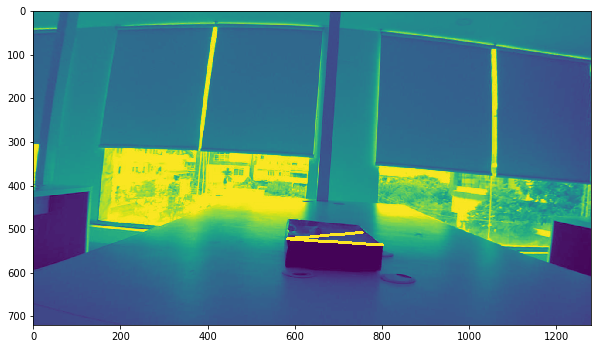

In [57]:
blank = np.zeros((blank.shape[:2]))

#blank = cv2.line(undistortedGray.copy(),(ml[0],ml[1]),(int(middlex),int(middley)),255,5)
blank = cv2.line(undistortedGray.copy(),(ml[0],ml[1]),(int(tr[0]+10),int(tr[1]+18)),255,5)
 
blank = cv2.line(blank,(ml[0],ml[1]),(int(mr[0]),int(mr[1])),255,5)
#_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.figure(figsize=(10,12))
plt.imshow(blank)

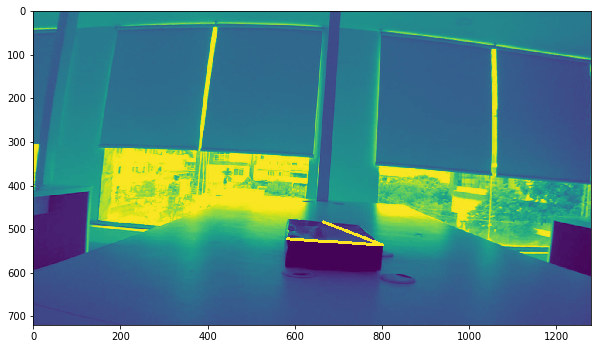

In [58]:
blank = np.zeros((blank.shape[:2]))

blank = cv2.line(undistortedGray.copy(),(mr[0],mr[1]),(int(middlex),int(middley)),255,5)
blank = cv2.line(blank,(ml[0],ml[1]),(int(mr[0]),int(mr[1])),255,5)
#_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.figure(figsize=(10,15))
plt.imshow(blank)

In [59]:
import math
 
def angle3pt(a, b, c):
    """Counterclockwise angle in degrees by turning from a to c around b
        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    #print(ang,"angle")
    return ang + 360 if ang < 0 else ang
 
#print(angle3pt((ml[0],ml[1]), (mr[0], mr[1]), (middlex, middley)))

In [60]:
#x = angle3pt((middlex, middley), (ml), (mr))
x = angle3pt((tr), (ml), (mr))
b = 360 - angle3pt((middlex, middley), (mr), (ml))
print("angle alpha = ", x,"*", "\nangle beta  = ", b,"*")

angle alpha =  15.08624903682235 * 
angle beta  =  17.508340834021737 *


In [61]:
print(tr[0] )

745


In [62]:
(ml[1] - tr[1])/2

16.5

In [63]:
tr[1]+85

574

In [64]:
c = 220
'''x = 60
b = 65'''

'x = 60\nb = 65'

In [65]:
(c*math.sin(x)*math.sin(b))/ math.sin(180-(x-b))

-599.3374991169559

In [66]:
math.sin(180)

-0.8011526357338304

In [67]:
(c*math.degrees(math.sin(65)*math.sin(68)))/ math.degrees(math.sin(180-(65-68)))

-230.4778246604133

In [68]:
(math.tan(15.086) *110) 

-78.85647544214606

In [69]:
8103.835634947186 / 4

2025.9589087367965

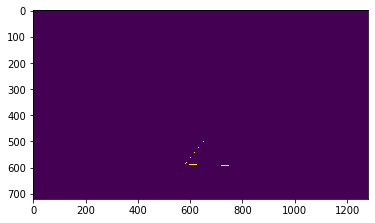

In [70]:
blank = np.zeros((gauss.shape[:2]))

blank = cv2.line(blank,(bl[0],bl[1]),(int(middlex),int(middley)),255,1)
blank = cv2.line(blank,(bl[0],bl[1]),(int(br[0]),int(br[1])),255,1)
_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh)

In [71]:
hspace, angles, distances = hough_line(blankThresh)

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

# Obtain angle for each line
angles = [a*180/np.pi for a in angle]
print(angles)

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

[-87.98882681564247]
0.0
